In [8]:
import alpdesign as alp
from alpdesign.seq import *
from alpdesign.mlp import *
from alpdesign.utils import *
import jax 
from jax_unirep import get_reps
import haiku as hk

In [9]:
def hamming(seq1, seq2): # seq1 and seq2 are of same length
    seqlist1 = list(seq1)
    seqlist2 = list(seq2)
    hamming_distance = 0.
    for i in range(len(seqlist1)):
        if seqlist1[i] == seqlist2[i]:
            continue
        hamming_distance += 1.
    return hamming_distance / len(seqlist1)

In [10]:
target = 'GIGAVLKVLTTGLPALISWIKRKRQQ'
# generate a set of sequence with length 26
seqs = ['PTWIIFLKAQWEQHSNLTNMRTFPEV',
'TISHFVCNHDICAWIKDMQAMQIKMC',
'CESWLWKRLFDGHADRWRSMPDYPIW',
'YLVENPLMFPLVAAFIHQWTRQISWH',
'QTEERLEAQISIYYIGAWSHYKVTDE',
'QADMWSQWDNLPQKPLFTEQATTWFE',
'ALICTNWFPIDLIPPVIAMIQCYRSV',
'LYKGTWQHQGPHWTDWKNVMGGEVVV',
'HCKWQHNQTQFIVDTFHNLTMYMTRL',
'KSIAHRKPKWISSINSIKFHTTCVGY',
'PFRPPFIWNRFFCWFDQDFYHCAQQF',
'WQEGVNYHGHAIEANKVEGLYYFKSH',
'LLCNSEFLHQPRRDFASHFCAKGPLR',
'VEVWRGWYKNGQNCCFCPNIYEPMAQ',
'QMEVLGMPIEHFCSYKYMSHRKNFWT',
'APQMIENAFWGHDTCEQRQASDFSFA',
'TLGTNYDWKFFLGHPQLVFHGEKYRV',
'QMMKKFMLGGYDPEIYLCNMNKVCAI',
'PLIRMKGQRAALMPADFHENITKGGH',
'TDSTRQWYKRPGQHRIEFADDSMPDV',
'KDCQGRYVNHVYDLVSIARACPPYNG',
'EFFTVPVVEVIFLSFPMKWTMTTTRF',
'PRCRKLKGRYYFNHYLVKTYIGGWLD',
'EELFVKDAKCQDVYCMNSRPIVPCEF',
'GARFVDYHMYTTCRVHTNIPREDIYR',
'SYCRMESTYCSGHNQVCRDEHPQKCQ',
'ERCGHQRVDQHRRTVVRGEIAYLVQW',
'AQICQAKSTLHGWRVILADRPNKHFY',
'DFMAWFDKNSCISTPAAQASAQAWRG',
'KDYFFKLYEYAWGKAPFPQQALRRHC',
'VYFLEEIPVPCPQAQRWQMKPYCPMN',
'CCQATNYMDYKYGLDLNKVNISHCRP',
'PAFGQLSCRTKQICIAMTFRCDTPDA',
'IWNIYVISWVRPDAKHDDATKFYPCR',
'IPHFGAICMLCSWGIPLMTCKVVNAA',
'CMNWWSMKYQEMPSFIIVDWNQSFAK',
'IMVKDSALKCCCGQAPCANEMNIDVQ',
'YVEVSNIWEDMGKAMQPSDLMVPQHD',
'FISNVTQRGNRDMYDMVDDMTHYIKF',
'IDRYSHDVPMTNATDVWIYYSVEMYN',
'PGATTQYFCFLPLRMEIRANPKCRKP',
'RTPLPKNFTNYAQIINGCQYFLSEDH',
'MQLLTCFMIRMKEDPAMMYFGPDNNR',
'NYPWLNGTQWASSTDFTCSSIQRCQI',
'SGDRWHFSPYHGCALAMVHPMYTWIT',
'GAHQATVGQCQTQTIEIFIHEACVGE',
'PLKIVKRCIRFIWLYHKKFWIFIFTR',
'FPTLGWPCEMPLELTYNSWISICGSD',
'QVKASGQKGISNGCPQEFHQGTLNFP',
'HIQKYHNWPNHWHCPNMNFIQTTWFR']


In [11]:
labels = []
for seq in seqs:
    labels.append(hamming(target, seq))
reps = get_reps(seqs)[0]
print(reps.shape)

(50, 1900)


In [12]:
key = jax.random.PRNGKey(37)
#key, _ = jax.random.split(key, num=2)
forward = hk.without_apply_rng(hk.transform(alp.model_forward))
params, mlp_loss = alp.ensemble_train(key, forward, reps, labels)

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt


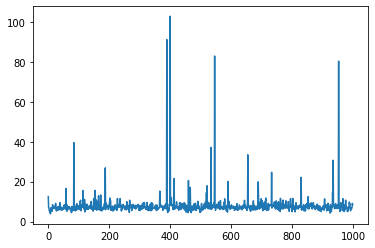

In [14]:
plt.plot(mlp_loss)